# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [8]:
import pandas as pd
import numpy as np
from scipy import stats

In [9]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [10]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [11]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [14]:
# we are interested in race and call columns for now
df = data[['race','call']]

# check data type and if any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 2 columns):
race    4870 non-null object
call    4870 non-null float32
dtypes: float32(1), object(1)
memory usage: 95.1+ KB


In [15]:
# unique values for race
df.race.unique()

array(['w', 'b'], dtype=object)

In [16]:
# unique values for call
df.call.unique()

array([0., 1.])

In [17]:
# number of white-sounding name rows
sum(df['race']=='w')

2435

In [18]:
# number of black-sounding name rows
sum(df['race']=='b')

2435

In [19]:
# number of callbacks for black-sounding names
sum(df[df.race=='b'].call)

157.0

In [20]:
# number of callbacks for white-sounding names
sum(df[df.race=='w'].call)

235.0

### Solution
The data looks fine and ready for the analysis. Here we are dealing with proportions for two populations i.e. Rate of callbacks for the people with white and black sounding names in their resumes.

- We can apply the Z test if the data is coming from normal distribution. CLT will allow us to assume that the 2 sample proportion data is from normal distribution with σ = √[pc(1-pc)/n1 + pc(1-pc)/n2] if the following conditions apply:

- The data is collected in random fashion. (Here the same resume was used just with different names and given to different managers.)

- The two samples are independent.

n1 * p1 >= 5

n1 * (1-p1) >= 5

n2 * p2 >= 5

n2 * (1-p2) >= 5

note: pc is the combined proportion for the 2 samples

In [21]:
# p1 is the callback rate for the white-sounding names
p1 = sum(df.call[df.race=='w'])/sum(df.race=='w')
n1 = sum(df.race=='w')

# p2 is the callback rate for the black-sounding names
p2 = sum(df.call[df.race=='b'])/sum(df.race=='b')
n2 = sum(df.race=='b')

satisfied = (n1*p1 >= 5) & (n1*(1-p1) >= 5) & (n2*p2 >= 5) & (n2*(1-p2) >= 5)

print('CLT conditions satisfied:',  satisfied)

CLT conditions satisfied: True


From above we see that CLT applies in this situation. And hence we can do the Z test. We need to test if both the population proportions are same. Hence our hypothesis is:

    H0: P1 = P2 or P1-P2 = 0
    H1: P1 > P2 or P1-P2 > 0

at the significance level of 𝛂 = 0.05


### Testing with two sample proportion Z test

In [22]:
# Let us find the p value

# test statistic here is prop difference
prop_diff = p1-p2
pc = (n1 * p1 + n2 * p2)/ (n1 + n2)
sigma = np.sqrt(pc*(1-pc)/n1 + pc*(1-pc)/n2)

print('prop_diff: ', prop_diff)
print('standard deviation: ', sigma)

# generic formula to get z score:  (test statistic - hypothesized value)/ (stand. deviation of statistic)
z = (p1-p2 -0) / sigma
print('\nz score: ', z)

# p value area of the curve for the specified z value
# (1 - (area of curve above z value) * 2
p = (1 - stats.norm.cdf(z)) * 2
print('p value: ', p)

prop_diff:  0.032032854209445585
standard deviation:  0.007796894036170457

z score:  4.108412152434346
p value:  3.983886837577444e-05


Since p value < 0.05, the data is statistically significant at the significance level of 𝛂 = 0.05 and we reject H0 in favor of H1. It means that there is convincing evidence that there is difference between callback rates for white-sounding vs black-sounding named resumes.

In [23]:
# z_critical at 95%
z_critical = stats.norm.ppf(q=0.975)
print('z_critical: ', z_critical)

# margin of error
moe = z_critical * sigma
print('\nmargin of error: ', moe)

# confidence interval
ci = (prop_diff-moe, prop_diff+moe)
print('95% confidence interval: ', ci)

z_critical:  1.959963984540054

margin of error:  0.015281631502169232
95% confidence interval:  (0.01675122270727635, 0.04731448571161482)


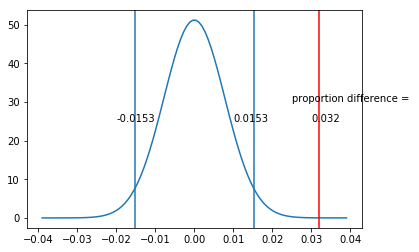

In [24]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
x = np.linspace(-5 * sigma, 5 * sigma, 100)
plt.plot(x, mlab.normpdf(x,0,sigma))
plt.axvline(moe)
plt.axvline(-moe)
plt.axvline(prop_diff,color='red')
plt.annotate(np.round(moe,4), (0.01,25))
plt.annotate(-np.round(moe,4), (-0.02,25))
plt.annotate('proportion difference = ', (0.025,30))
plt.annotate(np.round(prop_diff,4), (0.03,25))
plt.show()

### Bootstrap method of testing our Hypothesis

In [27]:
# We can resample from the same population assuming that there is no difference between the two proportions.
def get_prop_diff(sample1, sample2):
    
    p1 = np.sum(sample1['call'] == 1)/len(sample1)
    p2 = np.sum(sample2['call'] == 1)/len(sample2)
    
    return abs(p1-p2)
    
def get_bs_samples_diff(sample1, sample2, func, size):
    length1 = len(sample1)
    length2 = len(sample2)
    bs_prop_diffs = np.empty(size)
    
    for i in range(size):
        combined_sample = pd.concat([sample1,sample2])
        shuffled_sample = combined_sample.sample(length1+length2).reset_index(drop=True)

        new_sample1 = shuffled_sample.iloc[:length1,:]
        new_sample2 = shuffled_sample.iloc[length1:,:]
        
        bs_prop_diffs[i] = func(new_sample1,new_sample2)
        
    return bs_prop_diffs

bs_samples_diff = get_bs_samples_diff(df[df.race=='w'], df[df.race=='b'], get_prop_diff, 10000)
print(bs_samples_diff[:5])

[0.01806982 0.01314168 0.00082136 0.00657084 0.00492813]


In [28]:
# p value

p = np.sum(bs_samples_diff > prop_diff)/len(bs_samples_diff)
print('number of times the random selected prop differences is greater than our samples prop diff is: ', p)

number of times the random selected prop differences is greater than our samples prop diff is:  0.0


This suggests that there is some impact of white vs black sounding names since the probability of getting as extreme the difference that we see in our samples is 0 in 10000 data points.

### Chi-squared test for nominal (categorical) data

Chi-squared test is used to determine whether an association between 2 two categorical variables in a sample is likely to reflect a real association in the population. The sample data is used to calculate a single number (or test statistic), the size of which reflects the probability (p-value) that the observed association between the 2 variables has occurred by chance, ie due to sampling error

In [29]:
# Let us see the data in tabular format
contingency_table = pd.crosstab(index=df.race, columns=df.call, margins=True)
contingency_table.index = ['Black', 'White', 'Col_Totals']
contingency_table.columns=['No','Yes', 'Row_Totals']
contingency_table

,No,Yes,Row_Totals
Black,2278,157,2435
White,2200,235,2435
Col_Totals,4478,392,4870


In [32]:
observed = contingency_table.ix[0:2,0:2]
observed

,No,Yes
Black,2278,157
White,2200,235


In [33]:
expected = np.outer(contingency_table['Row_Totals'][0:2], contingency_table.ix['Col_Totals'][0:2]) / 4870
print(expected)

chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
print('chi squared statistic: ', chi_squared_stat)

[[2239.  196.]
 [2239.  196.]]
chi squared statistic:  16.87905041427022


In [34]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 1)   # *

print("Critical value: ", crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=1)
print("P value: ", p_value)

Critical value:  3.8414588206941236
P value:  3.983886837588546e-05


In [35]:
# similar results with directly using the stats lib
chi2, p, dof, ex =stats.chi2_contingency(observed)
print(ex)
print('degrees of freedom: ', dof)
print('chi squared statistic: ', chi2)
print("P value: ", p)

[[2239.  196.]
 [2239.  196.]]
degrees of freedom:  1
chi squared statistic:  16.44902858418937
P value:  4.997578389963255e-05


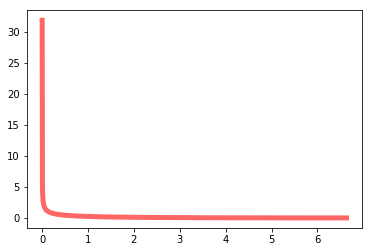

In [38]:
x = np.linspace(stats.chi2.ppf(0.01, dof), stats.chi2.ppf(0.99, dof), 1000)
plt.plot(x, stats.chi2.pdf(x, dof),'r-', lw=5, alpha=0.6, label='chi2 pdf')
plt.show()

A very small p value indicated that there is some relationship between the variables. And there is impact of black vs white souding names on the callback rates.

#### Summary

We started with checking if our sample was from a normal distribution. We found that given the conditions it was fine to assume a normal distribution. Further we could apply the CLT depending on our sample data characteristics.

To find out if we can determine if there was racial discrimination, we wrote Null Hypothesis that there was no discrimination and any difference in the callback rates was due to the chance.

We did two sample proportion Z and Chi Squared tests. Also tested our hypothesis with bootstrap method.

All the three tests found the p-value to be very low. That is the probability of actual difference in the 2 proportions was quite significantly low (p-value very near to 0 of order of e-05). We reject the null hypothesis in favor of the alternate hypothesis. There is significant impact of race on the callback rates.

However our anaylsis does not mean that race is the most important factor. We don't know if those names of the candidates can also be associated somehow with religion, location etc. The problem above says that the resumes are exact match for both the black and white sounding names. So there is no other direct variable other than names that can affect the callback rates. But again the names can be associated with unknown factor.